## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\mypcl\AppData\Local\Temp\ipykernel_7816\3180376326.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [3]:
data = get_data(data_path='motorbike_ambulance_calls.csv')
print(data)

       index      date  season  yr  mnth  hr  holiday  weekday  workingday  \
0          1    1/1/11  spring   0     1   0        0        6           0   
1          2    1/1/11  spring   0     1   1        0        6           0   
2          3    1/1/11  spring   0     1   2        0        6           0   
3          4    1/1/11  spring   0     1   3        0        6           0   
4          5    1/1/11  spring   0     1   4        0        6           0   
...      ...       ...     ...  ..   ...  ..      ...      ...         ...   
17374  17375  12/31/12  spring   1    12  19        0        1           1   
17375  17376  12/31/12  spring   1    12  20        0        1           1   
17376  17377  12/31/12  spring   1    12  21        0        1           1   
17377  17378  12/31/12  spring   1    12  22        0        1           1   
17378  17379  12/31/12  spring   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  cnt  
0      

In [4]:
print(data.min())

index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object


In [5]:
print(data.max())

index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object


In [6]:
print(data.shape)

(17379, 15)


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
None


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [8]:
print(data.isnull().sum())

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**



1. Ми вивчили основні статистичні показники для числових змінних, що включають максимальні та мінімальні значення, та з'ясували розмір нашого датасету.
2. Ми також перевірили типи даних усіх атрибутів, виявивши, що більшість з них мають числові типи, а лише два — тип "об'єкт", що полегшує подальший аналіз.
3. Ми переконалися, що в даних відсутні пропуски, що дозволяє нам використовувати всі змінні без необхідності їх видалення або заповнення.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [9]:
def transform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df
data = transform_date(data, 'date')
print(data['date'])


0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: date, Length: 17379, dtype: datetime64[ns]


C:\Users\mypcl\AppData\Local\Temp\ipykernel_7816\3973511181.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


In [11]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  return first_day, last_day
first_day, last_day = get_time_limits(data, 'date')
print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


Ми конвертували "date", який мав тип даних "object", до відповідного формату для аналізу даних.

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [12]:
data_categorical = data[['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']]
print(data_categorical)

       season  yr  mnth  hr  holiday  weekday  workingday  weathersit
0      spring   0     1   0        0        6           0           1
1      spring   0     1   1        0        6           0           1
2      spring   0     1   2        0        6           0           1
3      spring   0     1   3        0        6           0           1
4      spring   0     1   4        0        6           0           1
...       ...  ..   ...  ..      ...      ...         ...         ...
17374  spring   1    12  19        0        1           1           2
17375  spring   1    12  20        0        1           1           2
17376  spring   1    12  21        0        1           1           1
17377  spring   1    12  22        0        1           1           1
17378  spring   1    12  23        0        1           1           1

[17379 rows x 8 columns]


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [13]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  season_value = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}
  df[season_col_name] = df[season_col_name].replace(season_value)
  return df
data = encode_season(data, 'season')
print(data['season'].unique())

[1 2 3 4]


C:\Users\mypcl\AppData\Local\Temp\ipykernel_7816\3165904937.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[season_col_name] = df[season_col_name].replace(season_value)


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

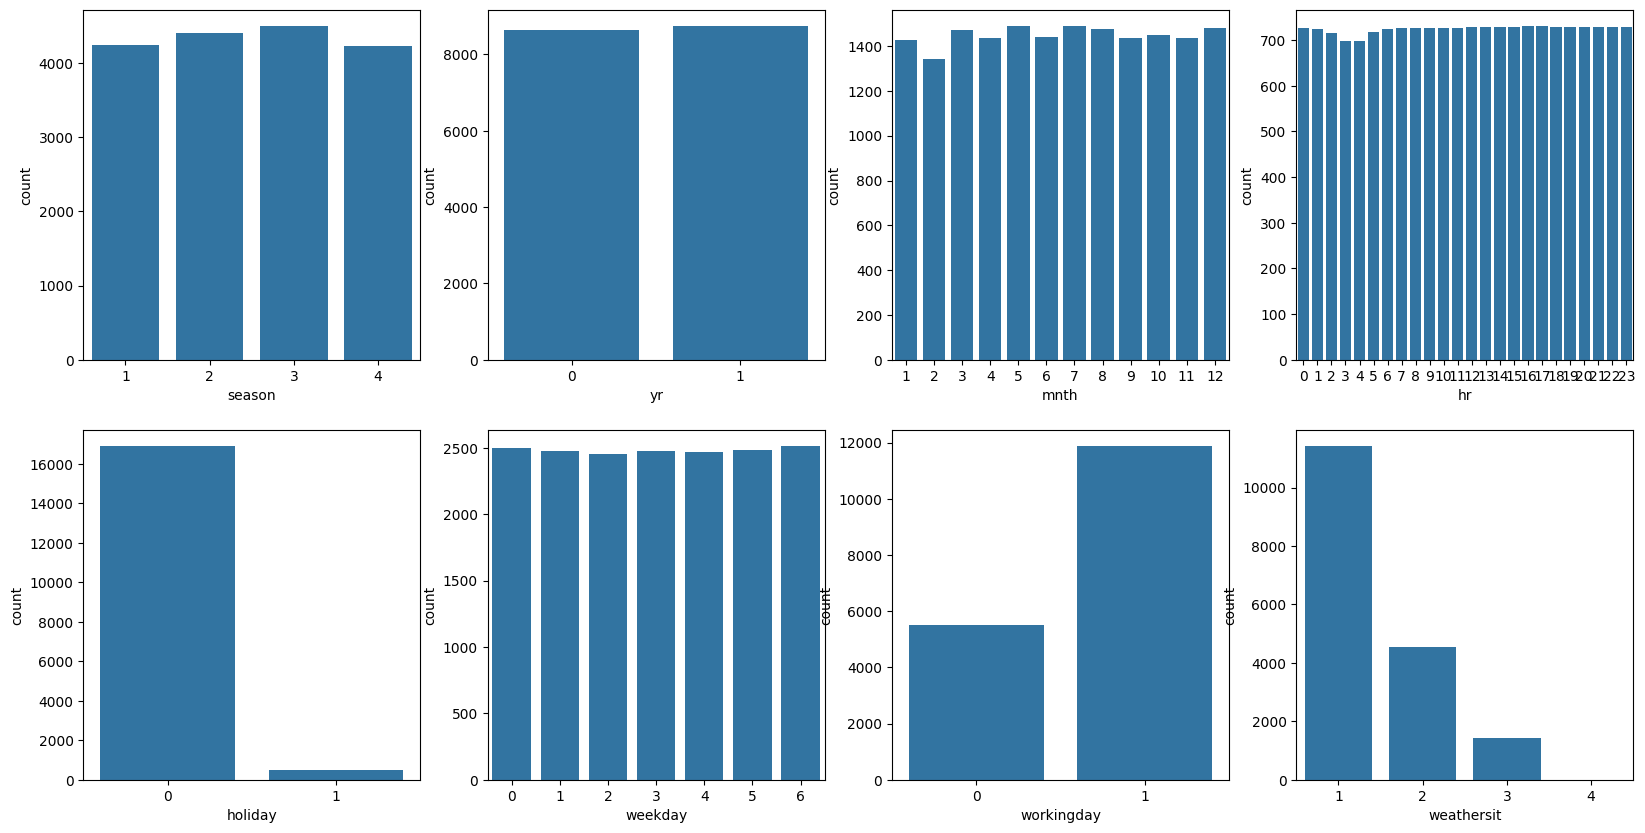

In [14]:
def plot_categorical_data(data, categorical_columns):
  fig, ax = plt.subplots(2, 4, figsize=(20, 10))
  for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(x=variable, data=data, ax=subplot)
  plt.show()

plot_categorical_data(data, data_categorical)

**Висновки з 5-7 завдання (детальні)**

1. Ми відокремили категоріальні змінні в окремий набір даних для зручності та щоб уникнути втрати категоріальних даних.
2. Ми перетворили змінну "Season" у числову шкалу та категоріальну змінну. Це спростить подальший аналіз.  
3. Побудовані графіки показують, що зміни розподілені рівномірно.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [15]:
data_numerical = data[['temp','hum','windspeed','atemp','cnt']]
print(data_numerical)

       temp   hum  windspeed   atemp  cnt
0      0.24  0.81     0.0000  0.2879   16
1      0.22  0.80     0.0000  0.2727   40
2      0.22  0.80     0.0000  0.2727   32
3      0.24  0.75     0.0000  0.2879   13
4      0.24  0.75     0.0000  0.2879    1
...     ...   ...        ...     ...  ...
17374  0.26  0.60     0.1642  0.2576  119
17375  0.26  0.60     0.1642  0.2576   89
17376  0.26  0.60     0.1642  0.2576   90
17377  0.26  0.56     0.1343  0.2727   61
17378  0.26  0.65     0.1343  0.2727   49

[17379 rows x 5 columns]


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

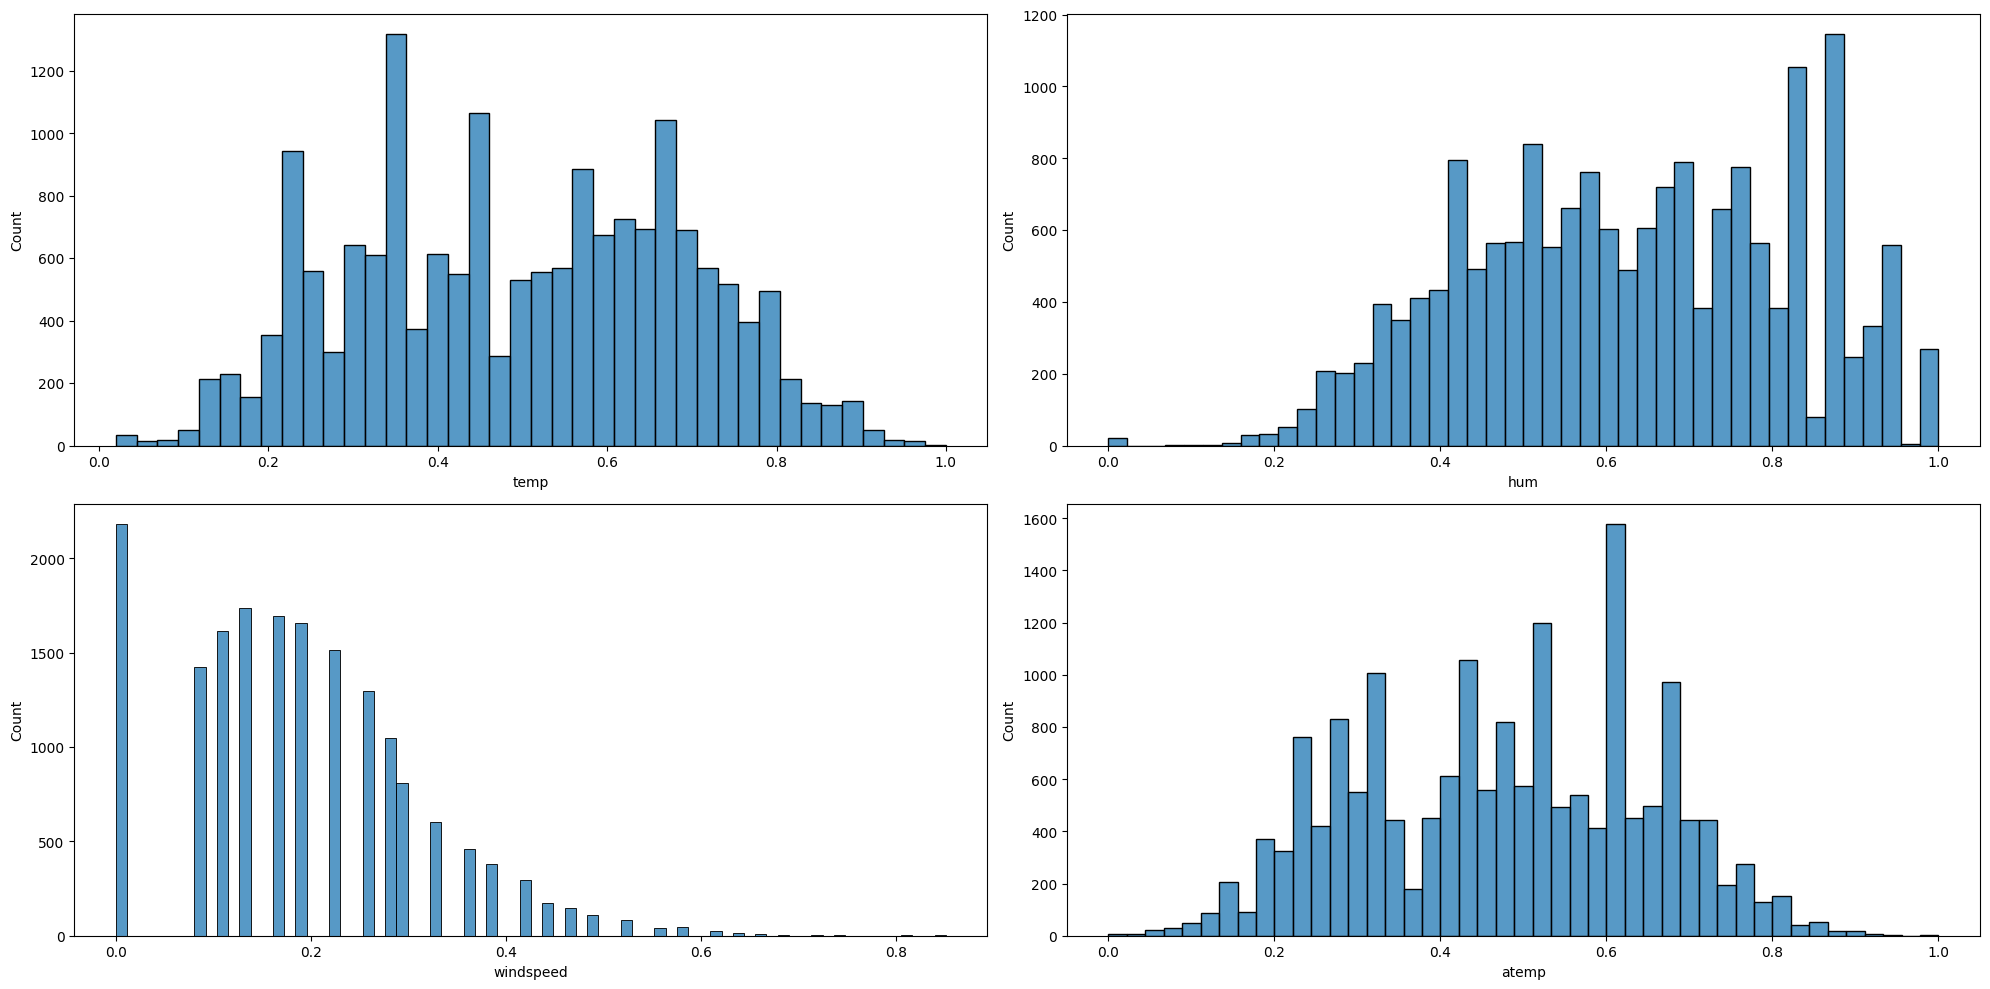

In [16]:
def visualize_numerical_data(dataset, num_columns):
    fig, ax = plt.subplots(2, 2, figsize=(20, 10))
    axes = ax.flatten()  
    for col, ax in zip(num_columns, axes):
        sns.histplot(data=dataset, x=col, ax=ax)
    plt.tight_layout() 
    plt.show()
visualize_numerical_data(data, data_numerical)

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Skewness for cnt: 1.2774116037490577


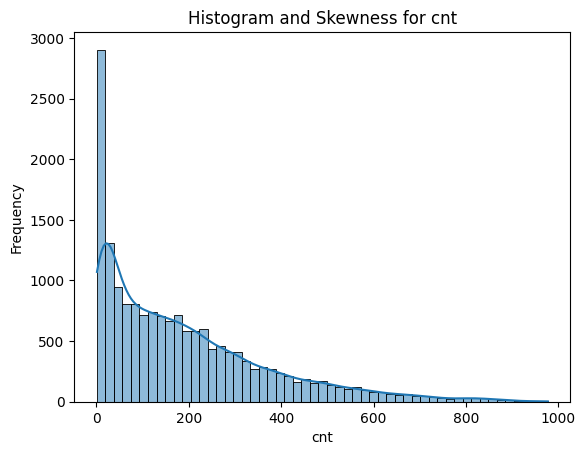

In [17]:
def display_histogram_and_skewness(dataset, feature):
    sns.histplot(dataset[feature], kde=True) 
    skewness_value = dataset[feature].skew()
    plt.title(f'Histogram and Skewness for {feature}') 
    plt.xlabel(feature) 
    plt.ylabel('Frequency') 
    print(f'Skewness for {feature}:', skewness_value)
    plt.show()
display_histogram_and_skewness(data, 'cnt')

**Висновки з 8-10 завдання (детальні)**



1. Виділення числових даних в окрему групу допомагає нам краще аналізувати ці змінні.
2. Ми виявили, що наші дані мають експоненціальний та біноміальний розподіли, що важливо для розуміння їх характеристик і планування далі аналізу.
3. Знайдений коефіцієнт нахилу 1.2774116037490577 показує, що більшість значень знаходяться лівіше середнього. Це також може вказувати на можливі викиди у даних.



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

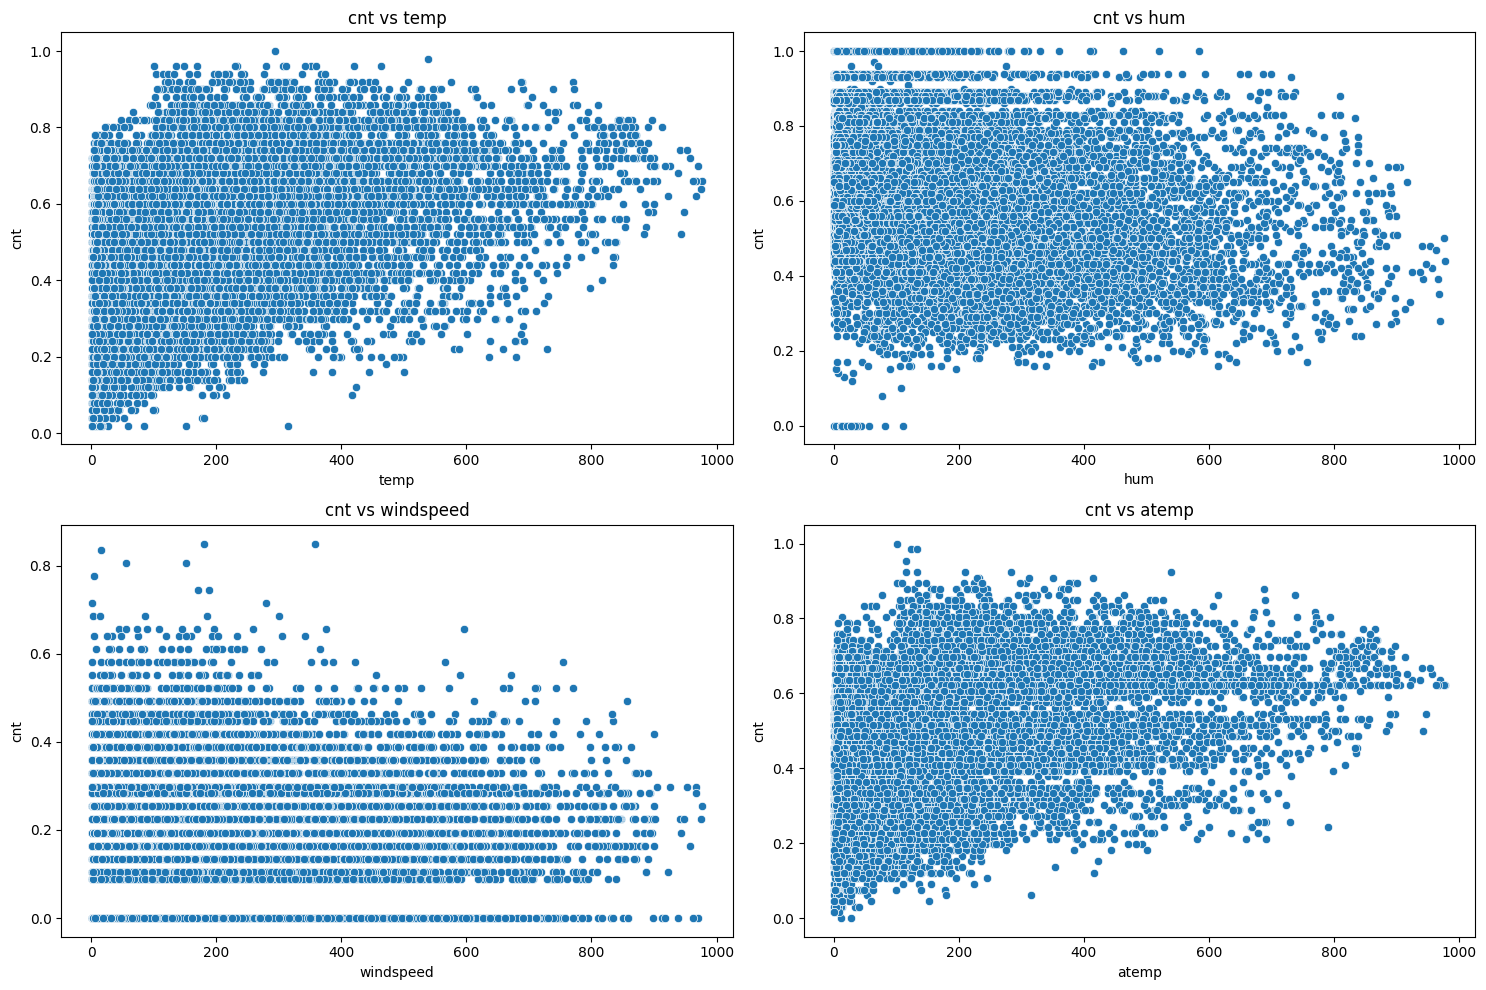

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten() 


for var, ax in zip(data_numerical.drop('cnt', axis=1).columns, ax):
    sns.scatterplot(x='cnt', y=var, data=data_numerical, ax=ax)  
    ax.set_title(f'cnt vs {var}') 
    ax.set_xlabel(var)  
    ax.set_ylabel('cnt')  

plt.tight_layout()  
plt.show()  

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

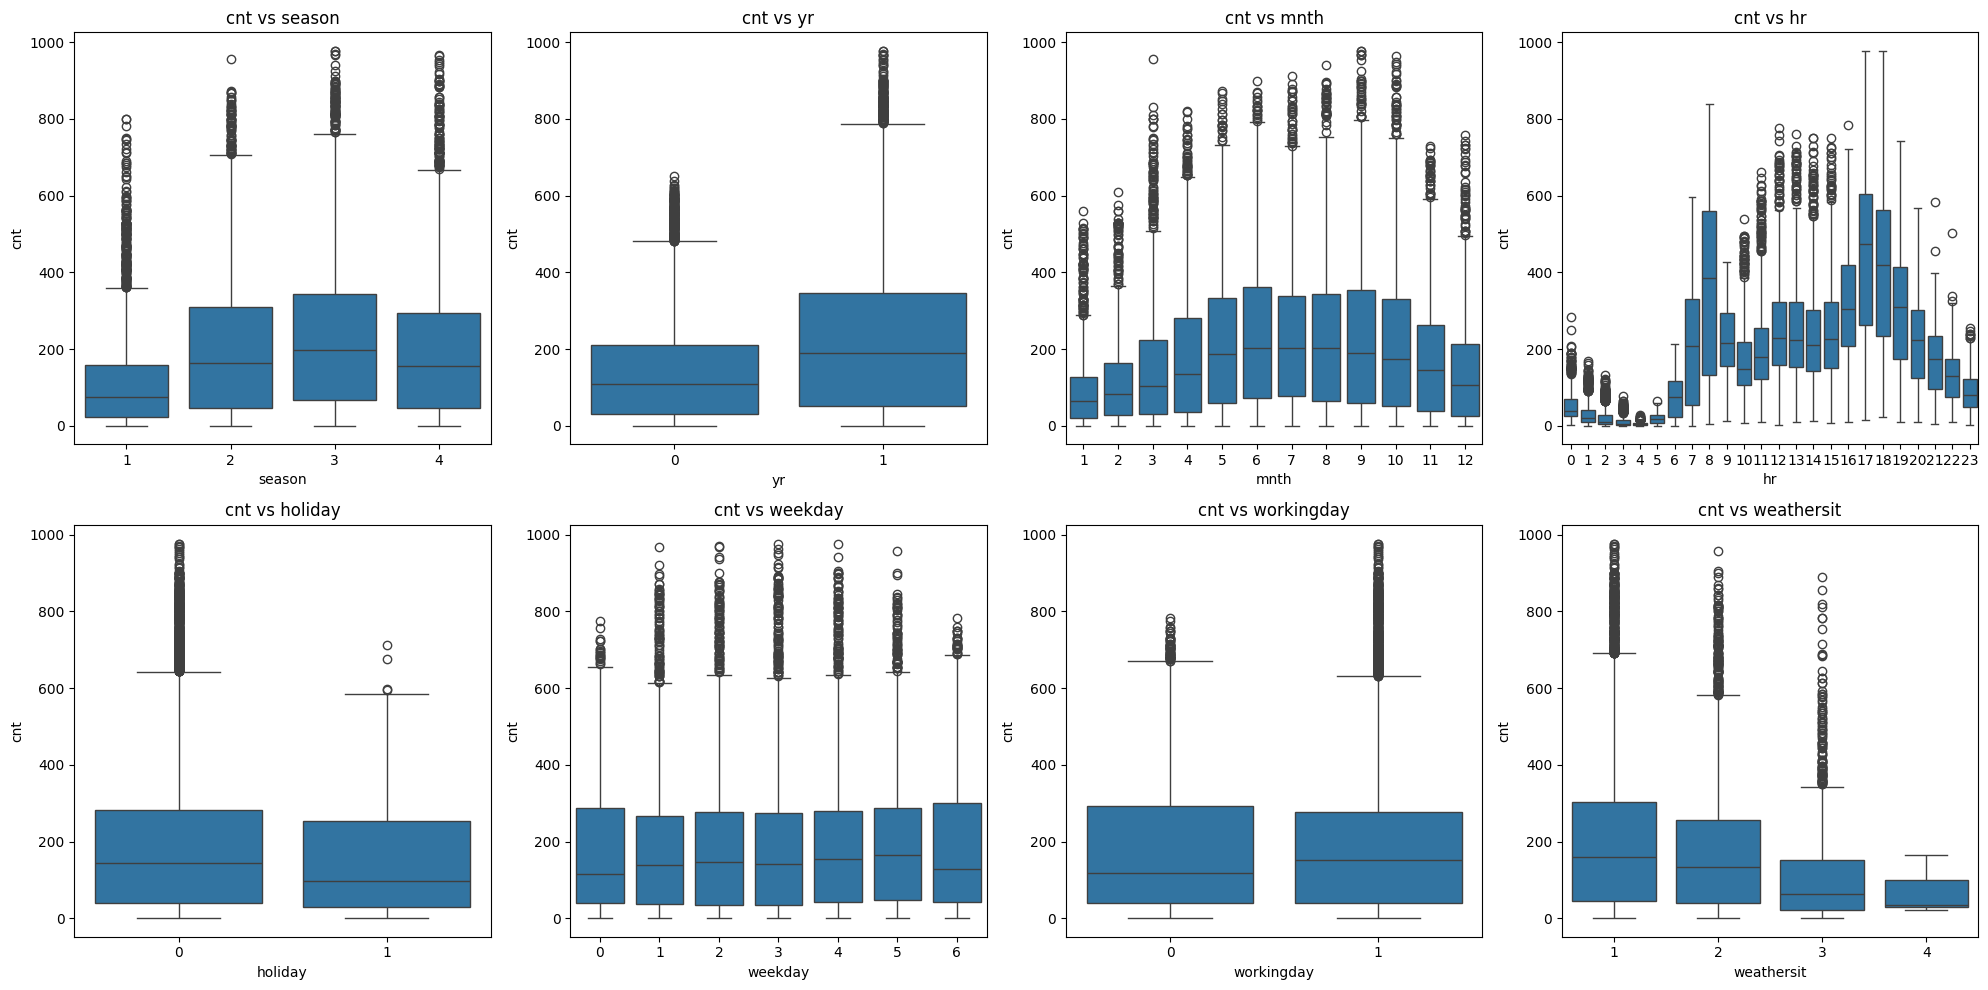

In [19]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax = ax.flatten()  

for var, ax in zip(data_categorical, ax):
    sns.boxplot(x=var, y='cnt', data=data, ax=ax) 
    ax.set_title(f'cnt vs {var}')
    ax.set_xlabel(var) 
    ax.set_ylabel('cnt') 

plt.tight_layout() 
plt.show() 

**Висновки з 11-12 завдання (детальні)**



1. На графіку ми бачимо, що кількість звернень за мотоциклами зростає з підвищенням температури, що логічно, адже люди активніше користуються таким транспортом у теплу пору року, зокрема весною та літом, в той час як восени та взимку активність знижується. Також, максимальна кількість викликів припадає на періоди слабкого вітру або повної відсутності вітру, в той час як вітряна погода призводить до зменшення кількості замовлень.   
2. Щодо аналізу блок-схем, то спостерігається мінімальна кількість викликів від опівночі до п'ятої ранку, що відповідає часу, коли більшість людей спить. Пік замовлень припадає на 8 ранку, що відповідає часу початку робочого дня, далі активність знижується, але знову зростає у вечірні години, коли люди повертаються з роботи. Замовлення протягом тижня залишаються стабільними, а кількість дзвінків збільшується з покращенням погодних умов.  




**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

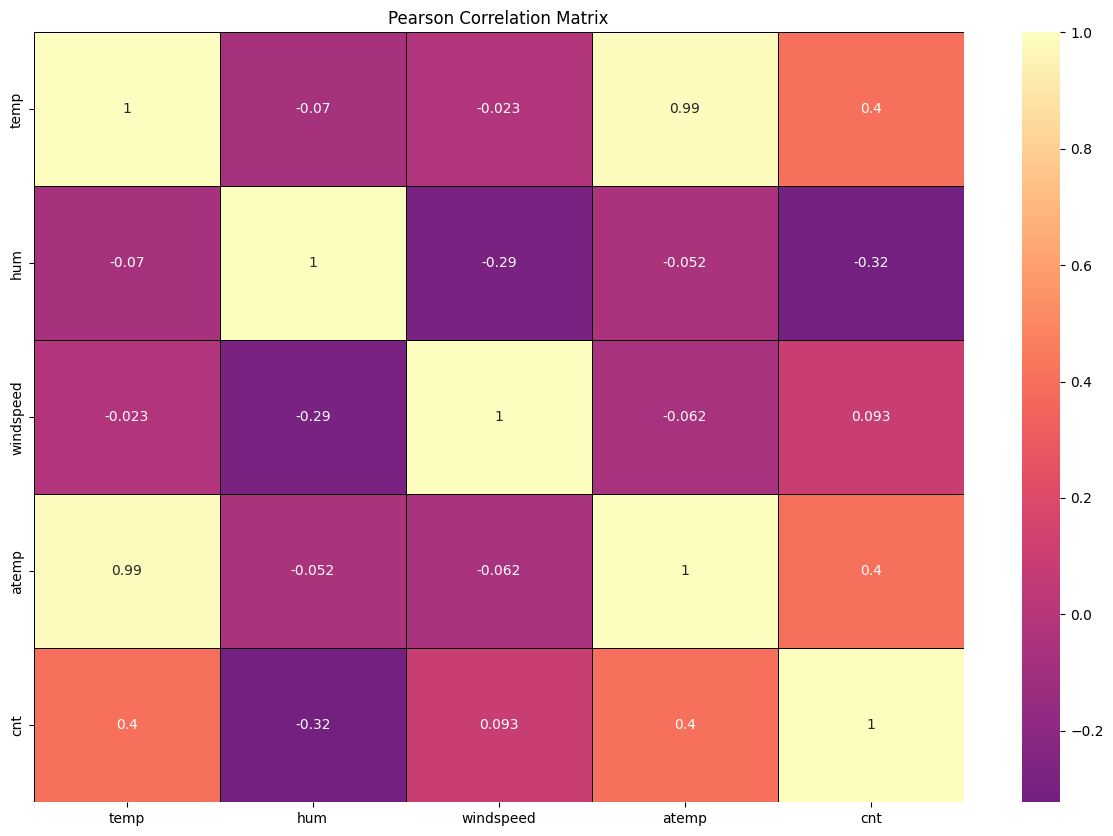

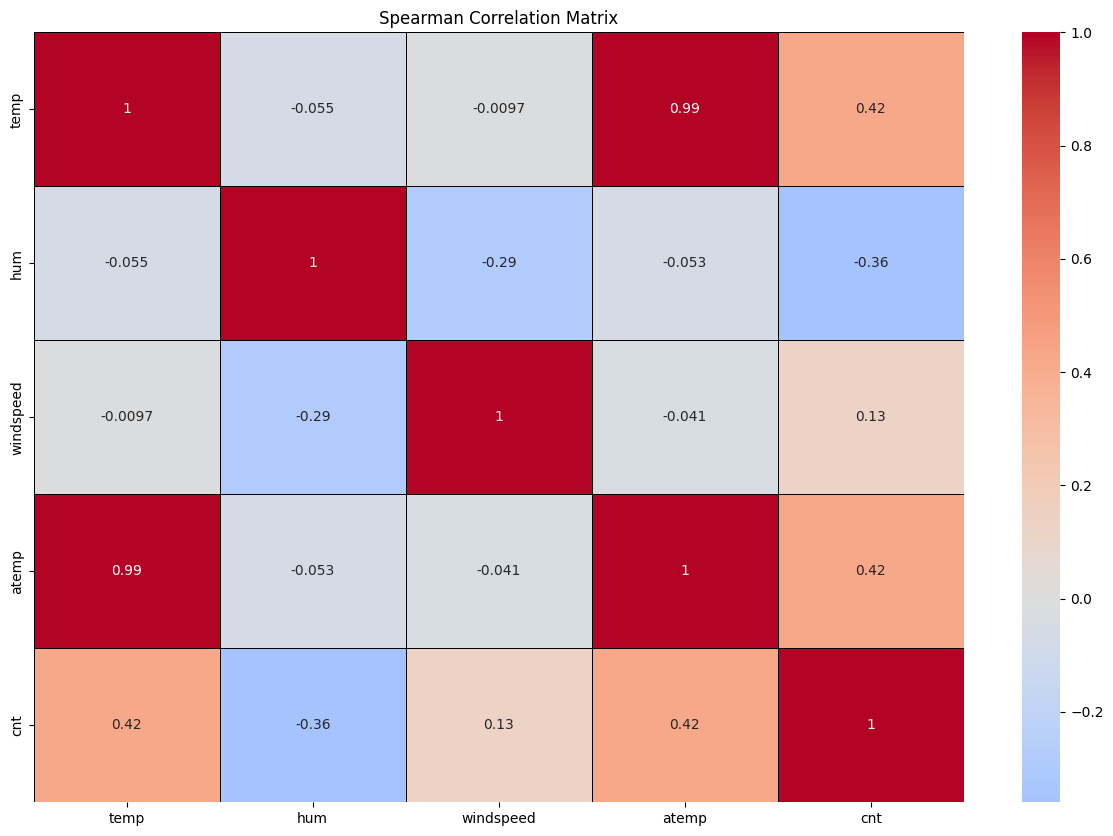

In [20]:
def plot_correlation_matrix(data, method='pearson', cmap='Blues'):
  correlation_matrix = data.corr(method=method)
  fig, ax = plt.subplots(figsize=(15, 10))
  sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, linewidths=0.5, linecolor='black', ax=ax)
  ax.set_title(f"{method.capitalize()} Correlation Matrix")
  plt.show()

plot_correlation_matrix(data_numerical, method='pearson', cmap="magma")
plot_correlation_matrix(data_numerical, method='spearman', cmap='coolwarm')

Ці графіки мають погрішність 0.015 - 0.04 або взагалі мають одинакові коефіціенти.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [22]:
def get_dummies(df):
  columns_to_encode = ['season', 'mnth', 'weekday', 'weathersit']
  features = df.copy()
  for column in columns_to_encode:
    dummies = pd.get_dummies(df[column], prefix=column)
    features = pd.concat([features, dummies], axis=1)
    features.drop(column, axis=1, inplace=True)
  return features

dummies = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [23]:
dummies['night_hours'] = (data['hr'] >= 22) | (data['hr'] <= 5)
dummies = dummies.drop('hr', axis = 1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [24]:
dummies_lr = dummies.drop(['atemp', 'date'], axis = 1)

In [25]:
def get_train_data(df: pd.DataFrame, target_column: str, test_size: float):
  X = df.drop(target_column, axis=1)
  y = df[target_column]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
  return X_train, X_test, y_train, y_test

In [26]:
X_train, X_test, y_train, y_test = get_train_data(dummies_lr, 'cnt', 0.3)

In [27]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [28]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 15877.966, test: 15224.769
R^2 train: 0.525, test: 0.518


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

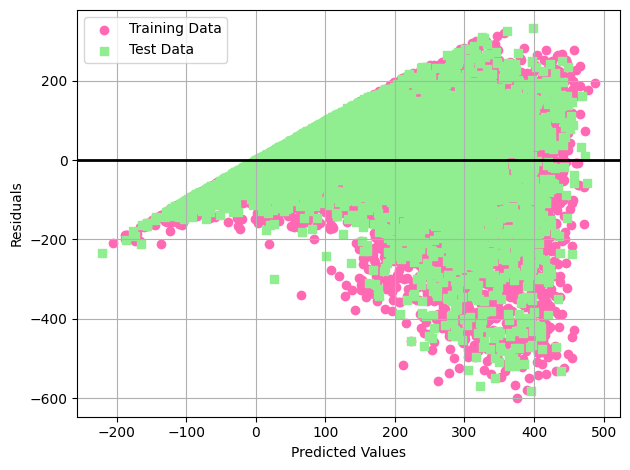

In [29]:
def display_residuals(predicted_train, actual_train, predicted_test, actual_test):

    plt.scatter(predicted_train, predicted_train - actual_train, c='hotpink', marker='o', label='Training Data')

    plt.scatter(predicted_test, predicted_test - actual_test, c='lightgreen', marker='s', label='Test Data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
  
    plt.axhline(y=0, xmin=0, xmax=1, color='black', lw=2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


display_residuals(y_train_pred, y_train, y_test_pred, y_test)

**Висновки з завдання (детальні)**



1. Діаграма підтверджує ефективність моделі лінійної регресії: результати для тренувального набору даних виявились точнішими, ніж для тестового.
2. Після розрахунку коефіцієнта детермінації R^2 для тренувального набору, ми з'ясували, що модель точно передбачає результати в 52.5% випадків.
3. Ми вирішили прибрати колонку "date", оскільки вона не впливає на передбачення нашої моделі. Крім того, ми видалили "atemp" через її високу кореляцію з "temp", обравши зберегти "temp", оскільки вона відображає реальну температуру.

